This is a companion notebook for the book [Deep Learning with Python, Second Edition](https://www.manning.com/books/deep-learning-with-python-second-edition?a_aid=keras&a_bid=76564dff). For readability, it only contains runnable code blocks and section titles, and omits everything else in the book: text paragraphs, figures, and pseudocode.

**If you want to be able to follow what's going on, I recommend reading the notebook side by side with your copy of the book.**

This notebook was generated for TensorFlow 2.6.

# Fundamentals of machine learning

## Generalization: The goal of machine learning

### Underfitting and overfitting

#### Noisy training data

#### Ambiguous features

#### Rare features and spurious correlations

**Adding white-noise channels or all-zeros channels to MNIST**

In [1]:
from tensorflow.keras.datasets import mnist # importing the mnist dataset from keras library 
import numpy as np # importing numpy library to work with arrays 

(train_images, train_labels), _ = mnist.load_data() # loading the mnist dataset into train_images and train_labels 
train_images = train_images.reshape((60000, 28 * 28)) # reshaping the train_images to 60000, 28*28 
train_images = train_images.astype("float32") / 255 # normalizing the train_images by dividing by 255 

train_images_with_noise_channels = np.concatenate( # adding random noise to the train_images 
    [train_images, np.random.random((len(train_images), 784))], axis=1) # adding random noise to the train_images 

train_images_with_zeros_channels = np.concatenate( # adding zeros to the train_images
    [train_images, np.zeros((len(train_images), 784))], axis=1) # adding zeros to the train_images

**Training the same model on MNIST data with noise channels or all-zero channels**

In [2]:
from tensorflow import keras # importing keras from tensorflow library
from tensorflow.keras import layers # importing layers from keras library

def get_model(): # defining a function to get the model
    model = keras.Sequential([ # creating a sequential model
        layers.Dense(512, activation="relu"), # adding a dense layer with 512 neurons and relu activation function
        layers.Dense(10, activation="softmax") # adding a dense layer with 10 neurons and softmax activation function
    ])
    model.compile(optimizer="rmsprop", # compiling the model with optimizer as rmsprop
                  loss="sparse_categorical_crossentropy", # setting loss function as sparse_categorical_crossentropy
                  metrics=["accuracy"]) # setting the metrics as accuracy
    return model # returning the model

model = get_model() # getting the model
history_noise = model.fit( # fitting the model with train_images_with_noise_channels and train_labels
    train_images_with_noise_channels, train_labels, 
    epochs=10, # setting the epochs as 10
    batch_size=128, # setting the batch size as 128
    validation_split=0.2) # setting the validation split as 0.2

model = get_model() # getting the model
history_zeros = model.fit( # fitting the model with train_images_with_zeros_channels and train_labels
    train_images_with_zeros_channels, train_labels,
    epochs=10, # setting the epochs as 10
    batch_size=128, # setting the batch size as 128
    validation_split=0.2) # setting the validation split as 0.2

Epoch 1/10
375/375 [==============================] - 2s 5ms/step - loss: 0.6205 - accuracy: 0.8101 - val_loss: 0.3329 - val_accuracy: 0.8946
Epoch 2/10
375/375 [==============================] - 1s 4ms/step - loss: 0.2482 - accuracy: 0.9221 - val_loss: 0.1897 - val_accuracy: 0.9460
Epoch 3/10
375/375 [==============================] - 1s 4ms/step - loss: 0.1582 - accuracy: 0.9512 - val_loss: 0.2029 - val_accuracy: 0.9407
Epoch 4/10
375/375 [==============================] - 1s 4ms/step - loss: 0.1122 - accuracy: 0.9646 - val_loss: 0.1447 - val_accuracy: 0.9562
Epoch 5/10
375/375 [==============================] - 1s 4ms/step - loss: 0.0819 - accuracy: 0.9737 - val_loss: 0.1327 - val_accuracy: 0.9606
Epoch 6/10
375/375 [==============================] - 1s 4ms/step - loss: 0.0602 - accuracy: 0.9809 - val_loss: 0.1406 - val_accuracy: 0.9598
Epoch 7/10
375/375 [==============================] - 1s 4ms/step - loss: 0.0445 - accuracy: 0.9857 - val_loss: 0.1285 - val_accuracy: 0.9655
Epoch 

**Plotting a validation accuracy comparison**

/Users/miakuntz/Library/Python/3.11/lib/python/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "orientation" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/Users/miakuntz/Library/Python/3.11/lib/python/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "facecolor" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/Users/miakuntz/Library/Python/3.11/lib/python/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "edgecolor" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/Users/miakuntz/Library/Python/3.11/lib/python/site-packages/IPython/core/

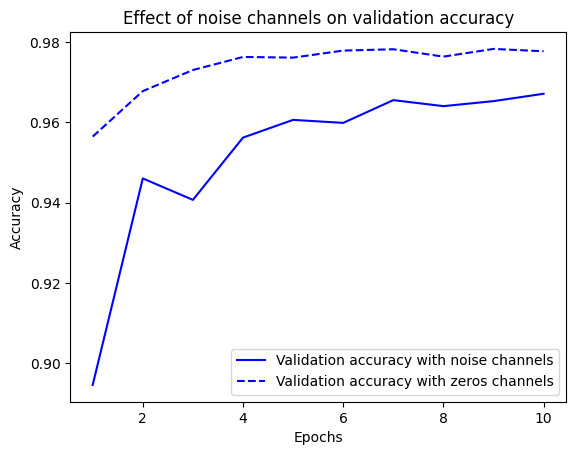

In [3]:
import matplotlib.pyplot as plt # importing matplotlib library to plot the graph
val_acc_noise = history_noise.history["val_accuracy"] # getting the validation accuracy from history_noise
val_acc_zeros = history_zeros.history["val_accuracy"] # getting the validation accuracy from history_zeros
epochs = range(1, 11) # setting the epochs as 1 to 11
plt.plot(epochs, val_acc_noise, "b-", # plotting the graph with epochs, val_acc_noise and val_acc_zeros
         label="Validation accuracy with noise channels") # setting the label as Validation accuracy with noise channels
plt.plot(epochs, val_acc_zeros, "b--", # plotting the graph with epochs, val_acc_noise and val_acc_zeros
         label="Validation accuracy with zeros channels") # setting the label as Validation accuracy with zeros channels
plt.title("Effect of noise channels on validation accuracy") # setting the title of the graph
plt.xlabel("Epochs") # setting the x-axis label as Epochs
plt.ylabel("Accuracy") # setting the y-axis label as Accuracy
plt.legend() # setting the legend 

### The nature of generalization in deep learning

**Fitting a MNIST model with randomly shuffled labels**

In [4]:
(train_images, train_labels), _ = mnist.load_data() # loading the mnist dataset into train_images and train_labels
train_images = train_images.reshape((60000, 28 * 28)) # reshaping the train_images to 60000, 28*28
train_images = train_images.astype("float32") / 255 # normalizing the train_images by dividing by 255

random_train_labels = train_labels[:] # copying the train_labels to random_train_labels
np.random.shuffle(random_train_labels) # shuffling the random_train_labels

model = keras.Sequential([ # creating a sequential model
    layers.Dense(512, activation="relu"), # adding a dense layer with 512 neurons and relu activation function
    layers.Dense(10, activation="softmax") # adding a dense layer with 10 neurons and softmax activation function
])
model.compile(optimizer="rmsprop", # compiling the model with optimizer as rmsprop
              loss="sparse_categorical_crossentropy", # setting loss function as sparse_categorical_crossentropy
              metrics=["accuracy"]) # setting the metrics as accuracy
model.fit(train_images, random_train_labels, # fitting the model with train_images and random_train_labels
          epochs=100, # setting the epochs as 100
          batch_size=128, # setting the batch size as 128
          validation_split=0.2) # setting the validation split as 0.2

Epoch 1/100
375/375 [==============================] - 1s 3ms/step - loss: 2.3161 - accuracy: 0.1024 - val_loss: 2.3042 - val_accuracy: 0.1152
Epoch 2/100
375/375 [==============================] - 1s 2ms/step - loss: 2.3000 - accuracy: 0.1165 - val_loss: 2.3101 - val_accuracy: 0.1105
Epoch 3/100
375/375 [==============================] - 1s 2ms/step - loss: 2.2911 - accuracy: 0.1266 - val_loss: 2.3135 - val_accuracy: 0.1051
Epoch 4/100
375/375 [==============================] - 1s 2ms/step - loss: 2.2772 - accuracy: 0.1405 - val_loss: 2.3248 - val_accuracy: 0.1034
Epoch 5/100
375/375 [==============================] - 1s 2ms/step - loss: 2.2596 - accuracy: 0.1539 - val_loss: 2.3368 - val_accuracy: 0.1039
Epoch 6/100
375/375 [==============================] - 1s 2ms/step - loss: 2.2392 - accuracy: 0.1679 - val_loss: 2.3490 - val_accuracy: 0.1002
Epoch 7/100
375/375 [==============================] - 1s 2ms/step - loss: 2.2144 - accuracy: 0.1834 - val_loss: 2.3637 - val_accuracy: 0.1042

#### The manifold hypothesis

#### Interpolation as a source of generalization

#### Why deep learning works

#### Training data is paramount

## Evaluating machine-learning models

### Training, validation, and test sets

#### Simple hold-out validation

#### K-fold validation

#### Iterated K-fold validation with shuffling

### Beating a common-sense baseline

### Things to keep in mind about model evaluation

## Improving model fit

### Tuning key gradient descent parameters

**Training a MNIST model with an incorrectly high learning rate**

In [5]:
(train_images, train_labels), _ = mnist.load_data() # loading the mnist dataset into train_images and train_labels
train_images = train_images.reshape((60000, 28 * 28)) # reshaping the train_images to 60000, 28*28
train_images = train_images.astype("float32") / 255 # normalizing the train_images by dividing by 255

model = keras.Sequential([ # creating a sequential model
    layers.Dense(512, activation="relu"), # adding a dense layer with 512 neurons and relu activation function
    layers.Dense(10, activation="softmax") # adding a dense layer with 10 neurons and softmax activation function
])
model.compile(optimizer=keras.optimizers.RMSprop(1.), # compiling the model with optimizer as RMSprop with learning rate as 1.0
              loss="sparse_categorical_crossentropy", # setting loss function as sparse_categorical_crossentropy
              metrics=["accuracy"]) # setting the metrics as accuracy
model.fit(train_images, train_labels, # fitting the model with train_images and train_labels
          epochs=10, # setting the epochs as 10
          batch_size=128, # setting the batch size as 128
          validation_split=0.2) # setting the validation split as 0.2

Epoch 1/10
375/375 [==============================] - 1s 2ms/step - loss: 890.9338 - accuracy: 0.3880 - val_loss: 2.5377 - val_accuracy: 0.2582
Epoch 2/10
375/375 [==============================] - 1s 2ms/step - loss: 4.1357 - accuracy: 0.2481 - val_loss: 2.0941 - val_accuracy: 0.2642
Epoch 3/10
375/375 [==============================] - 1s 2ms/step - loss: 2.8806 - accuracy: 0.2351 - val_loss: 2.4360 - val_accuracy: 0.2457
Epoch 4/10
375/375 [==============================] - 1s 2ms/step - loss: 2.8090 - accuracy: 0.2427 - val_loss: 2.3395 - val_accuracy: 0.2558
Epoch 5/10
375/375 [==============================] - 1s 2ms/step - loss: 2.6172 - accuracy: 0.2233 - val_loss: 2.4205 - val_accuracy: 0.2220
Epoch 6/10
375/375 [==============================] - 1s 3ms/step - loss: 2.5643 - accuracy: 0.2516 - val_loss: 2.1739 - val_accuracy: 0.2588
Epoch 7/10
375/375 [==============================] - 1s 2ms/step - loss: 2.4559 - accuracy: 0.2353 - val_loss: 1.9892 - val_accuracy: 0.2580
Epoc

**The same model with a more appropriate learning rate**

In [6]:
model = keras.Sequential([ # creating a sequential model
    layers.Dense(512, activation="relu"), # adding a dense layer with 512 neurons and relu activation function
    layers.Dense(10, activation="softmax") # adding a dense layer with 10 neurons and softmax activation function
])
model.compile(optimizer=keras.optimizers.RMSprop(1e-2), # compiling the model with optimizer as RMSprop with learning rate as 0.01
              loss="sparse_categorical_crossentropy", # setting loss function as sparse_categorical_crossentropy
              metrics=["accuracy"]) # setting the metrics as accuracy
model.fit(train_images, train_labels, # fitting the model with train_images and train_labels
          epochs=10, # setting the epochs as 10
          batch_size=128, # setting the batch size as 128
          validation_split=0.2) # setting the validation split as 0.2

Epoch 1/10
375/375 [==============================] - 1s 2ms/step - loss: 0.3673 - accuracy: 0.9115 - val_loss: 0.1780 - val_accuracy: 0.9508
Epoch 2/10
375/375 [==============================] - 1s 2ms/step - loss: 0.1431 - accuracy: 0.9632 - val_loss: 0.1327 - val_accuracy: 0.9694
Epoch 3/10
375/375 [==============================] - 1s 2ms/step - loss: 0.1204 - accuracy: 0.9724 - val_loss: 0.1493 - val_accuracy: 0.9715
Epoch 4/10
375/375 [==============================] - 1s 2ms/step - loss: 0.1022 - accuracy: 0.9779 - val_loss: 0.1990 - val_accuracy: 0.9693
Epoch 5/10
375/375 [==============================] - 1s 2ms/step - loss: 0.0923 - accuracy: 0.9812 - val_loss: 0.2016 - val_accuracy: 0.9712
Epoch 6/10
375/375 [==============================] - 1s 2ms/step - loss: 0.0799 - accuracy: 0.9838 - val_loss: 0.2411 - val_accuracy: 0.9703
Epoch 7/10
375/375 [==============================] - 1s 2ms/step - loss: 0.0753 - accuracy: 0.9862 - val_loss: 0.2341 - val_accuracy: 0.9734
Epoch 

### Leveraging better architecture priors

### Increasing model capacity

**A simple logistic regression on MNIST**

In [7]:
model = keras.Sequential([layers.Dense(10, activation="softmax")]) # creating a sequential model with a dense layer with 10 neurons and softmax activation function
model.compile(optimizer="rmsprop", # compiling the model with optimizer as rmsprop
              loss="sparse_categorical_crossentropy", # setting loss function as sparse_categorical_crossentropy
              metrics=["accuracy"]) # setting the metrics as accuracy
history_small_model = model.fit( # fitting the model with train_images and train_labels
    train_images, train_labels, 
    epochs=20, # setting the epochs as 20
    batch_size=128, # setting the batch size as 128
    validation_split=0.2) # setting the validation split as 0.2

Epoch 1/20
375/375 [==============================] - 0s 760us/step - loss: 0.6799 - accuracy: 0.8305 - val_loss: 0.3602 - val_accuracy: 0.9053
Epoch 2/20
375/375 [==============================] - 0s 521us/step - loss: 0.3513 - accuracy: 0.9043 - val_loss: 0.3068 - val_accuracy: 0.9145
Epoch 3/20
375/375 [==============================] - 0s 526us/step - loss: 0.3157 - accuracy: 0.9123 - val_loss: 0.2917 - val_accuracy: 0.9177
Epoch 4/20
375/375 [==============================] - 0s 521us/step - loss: 0.2990 - accuracy: 0.9173 - val_loss: 0.2811 - val_accuracy: 0.9217
Epoch 5/20
375/375 [==============================] - 0s 530us/step - loss: 0.2895 - accuracy: 0.9190 - val_loss: 0.2761 - val_accuracy: 0.9247
Epoch 6/20
375/375 [==============================] - 0s 532us/step - loss: 0.2830 - accuracy: 0.9212 - val_loss: 0.2728 - val_accuracy: 0.9246
Epoch 7/20
375/375 [==============================] - 0s 528us/step - loss: 0.2782 - accuracy: 0.9225 - val_loss: 0.2679 - val_accuracy:

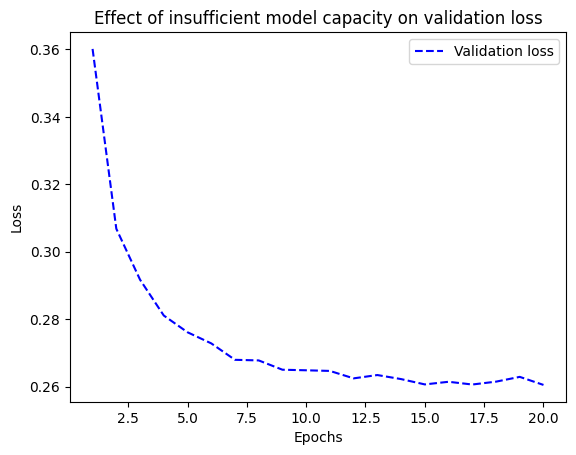

In [8]:
import matplotlib.pyplot as plt # importing matplotlib library to plot the graph
val_loss = history_small_model.history["val_loss"] # getting the validation loss from history_small_model
epochs = range(1, 21) # setting the epochs as 1 to 21
plt.plot(epochs, val_loss, "b--", # plotting the graph with epochs and val_loss
         label="Validation loss") # setting the label as Validation loss
plt.title("Effect of insufficient model capacity on validation loss") # setting the title of the graph
plt.xlabel("Epochs") # setting the x-axis label as Epochs
plt.ylabel("Loss") # setting the y-axis label as Loss
plt.legend() # setting the legend

In [9]:
model = keras.Sequential([ # creating a sequential model
    layers.Dense(96, activation="relu"), # adding a dense layer with 96 neurons and relu activation function
    layers.Dense(96, activation="relu"), # adding a dense layer with 96 neurons and relu activation function
    layers.Dense(10, activation="softmax"), # adding a dense layer with 10 neurons and softmax activation function
])
model.compile(optimizer="rmsprop", # compiling the model with optimizer as rmsprop
              loss="sparse_categorical_crossentropy", # setting loss function as sparse_categorical_crossentropy
              metrics=["accuracy"]) # setting the metrics as accuracy
history_large_model = model.fit( # fitting the model with train_images and train_labels
    train_images, train_labels,
    epochs=20, # setting the epochs as 20
    batch_size=128, # setting the batch size as 128
    validation_split=0.2) # setting the validation split as 0.2

Epoch 1/20
375/375 [==============================] - 1s 1ms/step - loss: 0.3717 - accuracy: 0.8954 - val_loss: 0.1957 - val_accuracy: 0.9418
Epoch 2/20
375/375 [==============================] - 0s 1ms/step - loss: 0.1611 - accuracy: 0.9524 - val_loss: 0.1297 - val_accuracy: 0.9628
Epoch 3/20
375/375 [==============================] - 0s 1ms/step - loss: 0.1126 - accuracy: 0.9663 - val_loss: 0.1106 - val_accuracy: 0.9667
Epoch 4/20
375/375 [==============================] - 0s 987us/step - loss: 0.0876 - accuracy: 0.9731 - val_loss: 0.1057 - val_accuracy: 0.9702
Epoch 5/20
375/375 [==============================] - 0s 1ms/step - loss: 0.0705 - accuracy: 0.9785 - val_loss: 0.0978 - val_accuracy: 0.9729
Epoch 6/20
375/375 [==============================] - 0s 963us/step - loss: 0.0576 - accuracy: 0.9826 - val_loss: 0.1165 - val_accuracy: 0.9691
Epoch 7/20
375/375 [==============================] - 0s 987us/step - loss: 0.0480 - accuracy: 0.9849 - val_loss: 0.0893 - val_accuracy: 0.9762


## Improving generalization

### Dataset curation

### Feature engineering

### Using early stopping

### Regularizing your model

#### Reducing the network's size

**Original model**

In [10]:
from tensorflow.keras.datasets import imdb # importing the imdb dataset from keras library
(train_data, train_labels), _ = imdb.load_data(num_words=10000) # loading the imdb dataset into train_data and train_labels with 10000 words

def vectorize_sequences(sequences, dimension=10000): # defining a function to vectorize the sequences
    results = np.zeros((len(sequences), dimension)) # creating a results array with zeros
    for i, sequence in enumerate(sequences): # iterating through the sequences
        results[i, sequence] = 1. # setting the results[i, sequence] as 1
    return results # returning the results
train_data = vectorize_sequences(train_data) # vectorizing the train_data

model = keras.Sequential([ # creating a sequential model
    layers.Dense(16, activation="relu"), # adding a dense layer with 16 neurons and relu activation function
    layers.Dense(16, activation="relu"), # adding a dense layer with 16 neurons and relu activation function
    layers.Dense(1, activation="sigmoid") # adding a dense layer with 1 neuron and sigmoid activation function
])
model.compile(optimizer="rmsprop", # compiling the model with optimizer as rmsprop
              loss="binary_crossentropy", # setting loss function as binary_crossentropy
              metrics=["accuracy"]) # setting the metrics as accuracy
history_original = model.fit(train_data, train_labels, # fitting the model with train_data and train_labels
                             epochs=20, batch_size=512, validation_split=0.4) # setting the epochs as 20, batch size as 512 and validation split as 0.4

Epoch 1/20
30/30 [==============================] - 1s 31ms/step - loss: 0.5200 - accuracy: 0.7888 - val_loss: 0.3917 - val_accuracy: 0.8698
Epoch 2/20
30/30 [==============================] - 0s 10ms/step - loss: 0.3136 - accuracy: 0.9039 - val_loss: 0.3144 - val_accuracy: 0.8850
Epoch 3/20
30/30 [==============================] - 0s 9ms/step - loss: 0.2311 - accuracy: 0.9265 - val_loss: 0.2885 - val_accuracy: 0.8862
Epoch 4/20
30/30 [==============================] - 0s 7ms/step - loss: 0.1828 - accuracy: 0.9417 - val_loss: 0.2889 - val_accuracy: 0.8834
Epoch 5/20
30/30 [==============================] - 0s 7ms/step - loss: 0.1502 - accuracy: 0.9526 - val_loss: 0.2824 - val_accuracy: 0.8862
Epoch 6/20
30/30 [==============================] - 0s 6ms/step - loss: 0.1242 - accuracy: 0.9615 - val_loss: 0.3437 - val_accuracy: 0.8677
Epoch 7/20
30/30 [==============================] - 0s 7ms/step - loss: 0.1049 - accuracy: 0.9681 - val_loss: 0.3273 - val_accuracy: 0.8782
Epoch 8/20
30/30 [

**Version of the model with lower capacity**

In [11]:
model = keras.Sequential([ # creating a sequential model
    layers.Dense(4, activation="relu"), # adding a dense layer with 4 neurons and relu activation function
    layers.Dense(4, activation="relu"), # adding a dense layer with 4 neurons and relu activation function
    layers.Dense(1, activation="sigmoid") # adding a dense layer with 1 neuron and sigmoid activation function
])
model.compile(optimizer="rmsprop", # compiling the model with optimizer as rmsprop
              loss="binary_crossentropy", # setting loss function as binary_crossentropy
              metrics=["accuracy"]) # setting the metrics as accuracy
history_smaller_model = model.fit( # fitting the model with train_data and train_labels
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4) # setting the epochs as 20, batch size as 512 and validation split as 0.4

Epoch 1/20
30/30 [==============================] - 1s 28ms/step - loss: 0.6214 - accuracy: 0.6474 - val_loss: 0.5674 - val_accuracy: 0.7939
Epoch 2/20
30/30 [==============================] - 0s 8ms/step - loss: 0.5264 - accuracy: 0.8039 - val_loss: 0.5141 - val_accuracy: 0.8408
Epoch 3/20
30/30 [==============================] - 0s 6ms/step - loss: 0.4729 - accuracy: 0.8639 - val_loss: 0.4807 - val_accuracy: 0.8634
Epoch 4/20
30/30 [==============================] - 0s 6ms/step - loss: 0.4350 - accuracy: 0.8937 - val_loss: 0.4604 - val_accuracy: 0.8533
Epoch 5/20
30/30 [==============================] - 0s 6ms/step - loss: 0.4030 - accuracy: 0.9151 - val_loss: 0.4404 - val_accuracy: 0.8779
Epoch 6/20
30/30 [==============================] - 0s 5ms/step - loss: 0.3749 - accuracy: 0.9340 - val_loss: 0.4298 - val_accuracy: 0.8768
Epoch 7/20
30/30 [==============================] - 0s 5ms/step - loss: 0.3505 - accuracy: 0.9460 - val_loss: 0.4264 - val_accuracy: 0.8707
Epoch 8/20
30/30 [=

**Version of the model with higher capacity**

In [12]:
model = keras.Sequential([ # creating a sequential model
    layers.Dense(512, activation="relu"), # adding a dense layer with 512 neurons and relu activation function
    layers.Dense(512, activation="relu"), # adding a dense layer with 512 neurons and relu activation function
    layers.Dense(1, activation="sigmoid") # adding a dense layer with 1 neuron and sigmoid activation function
])
model.compile(optimizer="rmsprop", # compiling the model with optimizer as rmsprop
              loss="binary_crossentropy", # setting loss function as binary_crossentropy
              metrics=["accuracy"]) # setting the metrics as accuracy
history_larger_model = model.fit( # fitting the model with train_data and train_labels
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4) # setting the epochs as 20, batch size as 512 and validation split as 0.4

Epoch 1/20
30/30 [==============================] - 3s 76ms/step - loss: 0.5574 - accuracy: 0.7503 - val_loss: 0.3095 - val_accuracy: 0.8828
Epoch 2/20
30/30 [==============================] - 2s 55ms/step - loss: 0.2539 - accuracy: 0.9033 - val_loss: 0.2885 - val_accuracy: 0.8858
Epoch 3/20
30/30 [==============================] - 2s 53ms/step - loss: 0.1538 - accuracy: 0.9396 - val_loss: 0.3005 - val_accuracy: 0.8926
Epoch 4/20
30/30 [==============================] - 2s 55ms/step - loss: 0.0893 - accuracy: 0.9653 - val_loss: 0.2848 - val_accuracy: 0.8912
Epoch 5/20
30/30 [==============================] - 2s 72ms/step - loss: 0.0126 - accuracy: 0.9976 - val_loss: 0.4972 - val_accuracy: 0.8884
Epoch 6/20
30/30 [==============================] - 2s 54ms/step - loss: 0.1607 - accuracy: 0.9765 - val_loss: 0.3910 - val_accuracy: 0.8807
Epoch 7/20
30/30 [==============================] - 2s 54ms/step - loss: 0.0032 - accuracy: 0.9999 - val_loss: 0.5074 - val_accuracy: 0.8877
Epoch 8/20
30

#### Adding weight regularization

**Adding L2 weight regularization to the model**

In [13]:
from tensorflow.keras import regularizers # importing regularizers from keras library
model = keras.Sequential([ # creating a sequential model
    layers.Dense(16, # adding a dense layer with 16 neurons
                 kernel_regularizer=regularizers.l2(0.002), # setting the kernel_regularizer as l2 with 0.002
                 activation="relu"), # setting the activation function as relu
    layers.Dense(16, # adding a dense layer with 16 neurons
                 kernel_regularizer=regularizers.l2(0.002), # setting the kernel_regularizer as l2 with 0.002
                 activation="relu"), # setting the activation function as relu
    layers.Dense(1, activation="sigmoid") # adding a dense layer with 1 neuron and sigmoid activation function
])
model.compile(optimizer="rmsprop", # compiling the model with optimizer as rmsprop
              loss="binary_crossentropy", # setting loss function as binary_crossentropy
              metrics=["accuracy"]) # setting the metrics as accuracy
history_l2_reg = model.fit( # fitting the model with train_data and train_labels
    train_data, train_labels, 
    epochs=20, batch_size=512, validation_split=0.4) # setting the epochs as 20, batch size as 512 and validation split as 0.4

Epoch 1/20
30/30 [==============================] - 1s 28ms/step - loss: 0.5800 - accuracy: 0.7936 - val_loss: 0.4573 - val_accuracy: 0.8710
Epoch 2/20
30/30 [==============================] - 0s 9ms/step - loss: 0.3953 - accuracy: 0.8947 - val_loss: 0.4106 - val_accuracy: 0.8646
Epoch 3/20
30/30 [==============================] - 0s 7ms/step - loss: 0.3328 - accuracy: 0.9125 - val_loss: 0.3652 - val_accuracy: 0.8880
Epoch 4/20
30/30 [==============================] - 0s 7ms/step - loss: 0.3024 - accuracy: 0.9237 - val_loss: 0.3557 - val_accuracy: 0.8875
Epoch 5/20
30/30 [==============================] - 0s 6ms/step - loss: 0.2867 - accuracy: 0.9267 - val_loss: 0.3546 - val_accuracy: 0.8874
Epoch 6/20
30/30 [==============================] - 0s 6ms/step - loss: 0.2711 - accuracy: 0.9344 - val_loss: 0.3722 - val_accuracy: 0.8818
Epoch 7/20
30/30 [==============================] - 0s 6ms/step - loss: 0.2616 - accuracy: 0.9386 - val_loss: 0.3611 - val_accuracy: 0.8864
Epoch 8/20
30/30 [=

**Different weight regularizers available in Keras**

In [14]:
from tensorflow.keras import regularizers # importing regularizers from keras library
regularizers.l1(0.001) # setting the regularizer as l1 with 0.001
regularizers.l1_l2(l1=0.001, l2=0.001) # setting the regularizer as l1_l2 with l1 as 0.001 and l2 as 0.001

#### Adding dropout

**Adding dropout to the IMDB model**

In [15]:
model = keras.Sequential([ # creating a sequential model
    layers.Dense(16, activation="relu"), # adding a dense layer with 16 neurons and relu activation function
    layers.Dropout(0.5), # adding a dropout layer with 0.5
    layers.Dense(16, activation="relu"), # adding a dense layer with 16 neurons and relu activation function
    layers.Dropout(0.5), # adding a dropout layer with 0.5
    layers.Dense(1, activation="sigmoid") # adding a dense layer with 1 neuron and sigmoid activation function
])
model.compile(optimizer="rmsprop", # compiling the model with optimizer as rmsprop
              loss="binary_crossentropy", # setting loss function as binary_crossentropy
              metrics=["accuracy"]) # setting the metrics as accuracy
history_dropout = model.fit( # fitting the model with train_data and train_labels
    train_data, train_labels, 
    epochs=20, batch_size=512, validation_split=0.4) # setting the epochs as 20, batch size as 512 and validation split as 0.4

Epoch 1/20
30/30 [==============================] - 1s 28ms/step - loss: 0.6214 - accuracy: 0.6475 - val_loss: 0.4822 - val_accuracy: 0.8505
Epoch 2/20
30/30 [==============================] - 0s 9ms/step - loss: 0.4989 - accuracy: 0.7791 - val_loss: 0.3814 - val_accuracy: 0.8776
Epoch 3/20
30/30 [==============================] - 0s 8ms/step - loss: 0.4135 - accuracy: 0.8313 - val_loss: 0.3216 - val_accuracy: 0.8860
Epoch 4/20
30/30 [==============================] - 0s 7ms/step - loss: 0.3477 - accuracy: 0.8699 - val_loss: 0.2856 - val_accuracy: 0.8904
Epoch 5/20
30/30 [==============================] - 0s 8ms/step - loss: 0.3028 - accuracy: 0.8914 - val_loss: 0.2729 - val_accuracy: 0.8924
Epoch 6/20
30/30 [==============================] - 0s 7ms/step - loss: 0.2613 - accuracy: 0.9078 - val_loss: 0.2734 - val_accuracy: 0.8920
Epoch 7/20
30/30 [==============================] - 0s 7ms/step - loss: 0.2239 - accuracy: 0.9218 - val_loss: 0.2730 - val_accuracy: 0.8920
Epoch 8/20
30/30 [=

## Summary